<a href="https://colab.research.google.com/github/vdovetzi/NLP_Language_Detection/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи и формулировка задания

Имеется $dataset$ с предложениями на разных языках. Хочется обучить модель, которая сможеть решать задачу $language$ $detection$.

**Формулировка задания:**

*  На вход подается предложение $sentence$.
*  Вызов функции $predict(sentence)$ выводит на экран, на каком языке написано предложение.



# Необходимая теория


1.  Токенизация;
2. Stemming;
3. Stopwords;
4. Bag of Words;
5. Выборки: тестовая и тренировочная;
6. Модель



# Используемые инструменты

В своей работе я буду использовать следующие инструменты:



*   Библиотека $pandas$ для обработки и анализа данных
*   Библиотека $numpy$ для линала
* Библиотека $re$ для регулярных выражений
* Библиотека $seaborn$ для красивых визуализаций
* Библиотека $matplotlib.pyplot$ для построений графиков
* Библиотека $string$, чтобы воспользоваться $string.punctuation$
* Библиотека $nltk$ нужна для всего, так как это основной инструмент
* Библиотека $sklearn.model_selection$ для разбиения на выборки



In [167]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Посмотрим поподробнее на имеющийся $dataset$

In [115]:
dataset = pd.read_csv("Language Detection.csv")
dataset.head(10) # возращает первые 10 строчек

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


Как можем заметить, мы имеем формат **предложение** - **язык**.

Посмотрим теперь на то, какие языки мы вообще имеем в нашем $dataset$. Изобразим это в виде красивой столбчатой и круговой диаграмок.

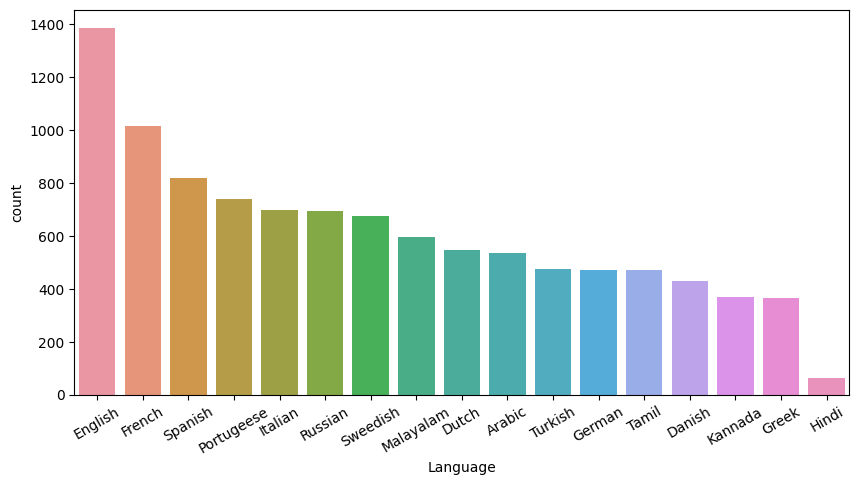

In [116]:
plt.figure(figsize=(10, 5))
sns.countplot(data= dataset, x="Language", order=dataset["Language"].value_counts().index)
plt.xticks(rotation=30)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

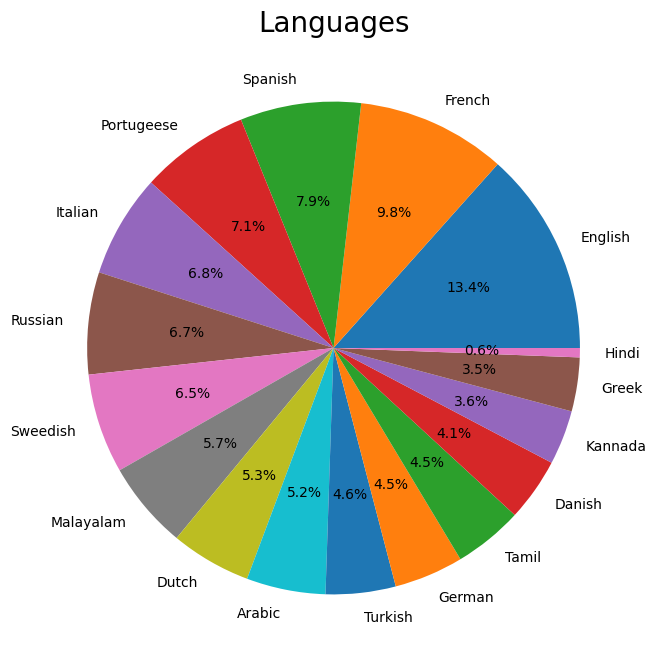

In [117]:
plt.figure(figsize=(8,8))
plt.pie(x = dataset['Language'].value_counts() ,autopct='%1.1f%%' ,labels=dataset['Language'].value_counts().index)
plt.title('Languages',fontsize=20)
plt.show

# Text Preprocessing

**Text** **Cleaning**

In [128]:
def Cleaner(text):
  # удалим все цифры и иные символы, кроме букв и приведём текст к нижнему регистру
  text = re.sub(r'[{}]'.format(string.punctuation), '', text)
  text = re.sub(r'\d+', '', text)
  return text.lower()


Может быть такое, что в нашем $dataset$ в каком-то предложении помимо основного языка, на котором оно написано есть и другие языки, например английский или русский, поэтому напишем функции, которые будут удалять эти побочные языки из предложения.

Понятно, что вариантов очень много, но кажется, что основным является английский, так как есть куча аббревиатур или каких-то названий, которые невозмомножно перевести на другой язык, поэтому их оставляют на английском.

Так что я считаю, что достаточно написать функцию, удаляющую английские символы.

In [140]:
def RemoveEnglish(text):
        text = re.sub(r'[a-zA-Z]+', '', text)
        return text.lower()

In [141]:
# функция, которая применяет к предложению функцию RemoveEnglish
def ApplyToSentence(sentence):
  if (sentence.Language != 'English'):
    sentence.Text = RemoveEnglish(sentence.Text)
  return sentence.Text

In [142]:
X = dataset.apply(ApplyToSentence, axis = 1) #axis = 1, так как применять функцию надо к столбцу
X = X.apply(Cleaner) # применяем Cleaner к столбцу с предложениями

y = dataset["Language"]

Посмотрим, что получилось:

In [143]:
X

0         nature in the broadest sense is the natural p...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4         the word nature is borrowed from the old fren...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ  ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Length: 10337, dtype: object

In [148]:
y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

**Токенизация**

In [146]:
# делаем токенизацию предложения с помощью word_tokenize
def Tokenize(sentence):
  token = word_tokenize(sentence)
  return token

Теперь давайте удалим английские и русские $stopwords$

In [149]:
def RemoveStopWords():
  stop_words_en = set(stopwords.words('english'))
  stop_words_ru = set(stopwords.words('russian'))
  for i in range(X.shape[0]):
    if (y[i] == 'English'):
      words = Tokenize(X[i])
      new_words = []
      for word in words:
        if (word not in stop_words_en):
          new_words.append(word)
      X[i] = ' '.join(new_words)
    elif (y[i] == 'Russian'):
      words = Tokenize(X[i])
      new_words = []
      for word in words:
        if (word not in stop_words_ru):
          new_words.append(word)
      X[i] = ' '.join(new_words)
  return X



In [157]:
X = RemoveStopWords()

In [158]:
X

0        nature broadest sense natural physical materia...
1        nature refer phenomena physical world also lif...
2                          study nature large part science
3        although humans part nature human activity oft...
4        word nature borrowed old french nature derived...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ  ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Length: 10337, dtype: object

**Stemming**


In [163]:
def Stemming():
  snowball_ru = SnowballStemmer(language='russian')
  snowball_en = SnowballStemmer(language='english')
  for i in range(X.shape[0]):
    new_words = []
    words = Tokenize(X[i])
    if (y[i] == 'English'):
      for word in words:
          new_words.append(snowball_en.stem(word))
      X[i] = ' '.join(new_words)
    elif (y[i] == 'Russian'):
      for word in words:
          new_words.append(snowball_ru.stem(word))
      X[i] = ' '.join(new_words)
  return X




In [165]:
X = Stemming()

In [166]:
X

0        natur broadest sen natur physic materi world univ
1        natur refer phenomena physic world also life g...
2                             studi natur larg part scienc
3        although human part natur human activ often un...
4        word natur borrow old french natur deriv latin...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ  ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Length: 10337, dtype: object

## Выбор модели

Самая простая модель - это $Bag$ $of$ $Words$ при помощи $CountVectorizer$

## Оптимизация гиперпараметров

На самом деле тут можно попробовать сделать не $Stemming$, а $Lemmatization$ и посмотреть, как от этого изменится $accuracy$.